# **Importing The Necessary Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# **Loading and Understanding Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
df.shape

(13954, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [11]:
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64


In [12]:
df[df['Amount'].isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [13]:
df.dropna(inplace=True)

In [14]:
df.nunique()

,0
Time,9480
V1,13494
V2,13494
V3,13494
V4,13494
V5,13494
V6,13494
V7,13494
V8,13494
V9,13494


In [15]:
df['Class'] = df['Class'].astype(int)

In [16]:
df['Class'].value_counts()

,count
Class,
0,13897
1,56


# **Insights**
**1. We found there was one row will null values so we dropped that sow as it doesnt impact the data that much.
2. Classes are highly imbalanced**

# **Exploratory Data Analysis**

Text(0, 0.5, 'Count')

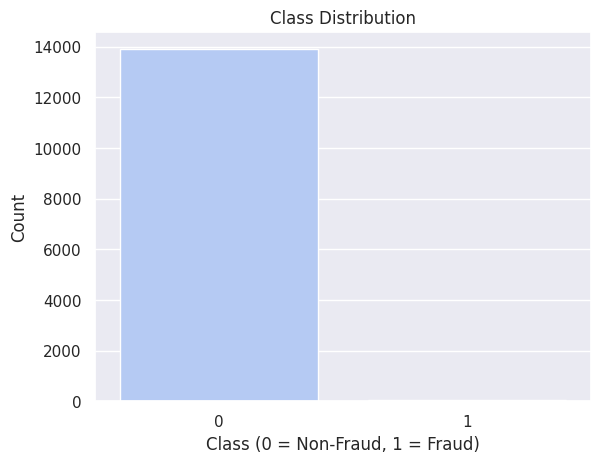

In [17]:
sns.countplot(x=df["Class"], palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

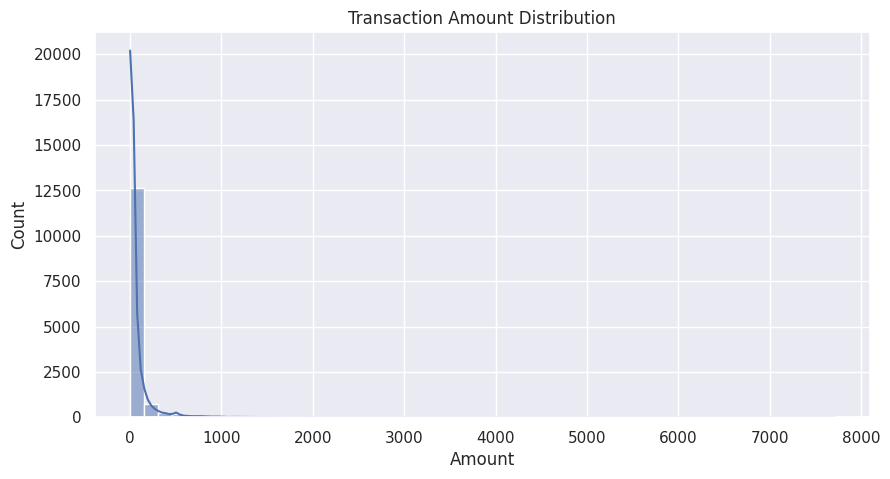

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")

Text(0, 0.5, 'Transaction Amount')

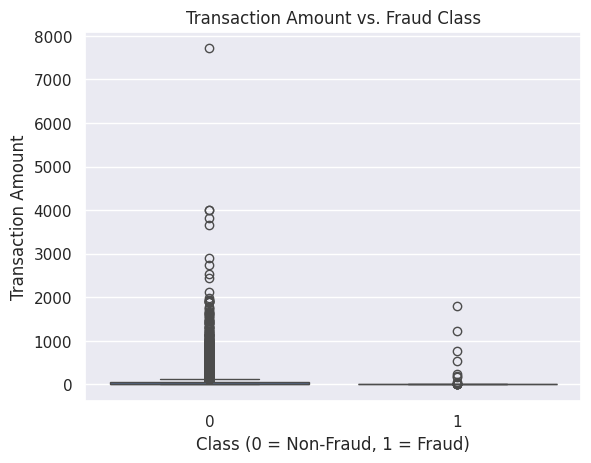

In [19]:
sns.boxplot(x=df["Class"], y=df["Amount"])
plt.title("Transaction Amount vs. Fraud Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")

Text(0.5, 1.0, 'Correlation Heatmap')

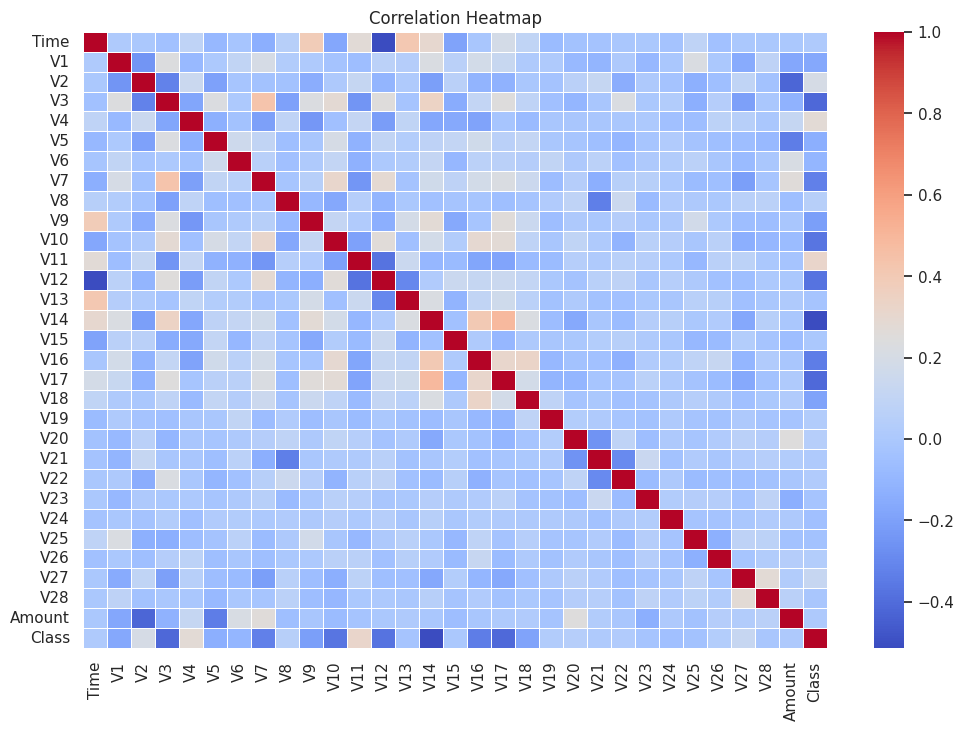

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linewidths = 0.5, cmap = 'coolwarm')
plt.title('Correlation Heatmap')

In [60]:
from sklearn.model_selection import train_test_split
x = df.drop('Class' , axis = 1)
y = df['Class']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote , y_smote = smote.fit_resample(x_train , y_train)

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca = PCA()
from sklearn.pipeline import Pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.7))
])

x_train_processed = preprocessor.fit_transform(x_smote)
x_test_processed = preprocessor.transform(x_test)


In [64]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

# **Tuning the Hyperparameters**

In [66]:
svm_param_grid = {
    'C' : [0.1 , 1 , 10],
    'kernel' : ['linear' , 'rbf']
}

dt_param_grid = {
    'max_depth' : [2 , 3 , 5],
    'min_samples_split' : [2 , 3 , 5]
    }

In [70]:
svm_grid = GridSearchCV(SVC(class_weight = 'balanced' , random_state = 42) , svm_param_grid , cv = 5)
svm_grid.fit(x_train_processed , y_smote)
best_svm = svm_grid.best_estimator_
print(best_svm)

dt_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced' , random_state = 42) , dt_param_grid , cv = 5)
dt_grid.fit(x_train_processed , y_smote)
best_dt = dt_grid.best_estimator_
print(best_dt)

SVC(C=10, class_weight='balanced', random_state=42)
DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)


In [71]:
train_meta_features = np.column_stack([
    best_svm.predict(x_train_processed),
    best_dt.predict(x_train_processed)
])

test_meta_features = np.column_stack([
    best_svm.predict(x_test_processed),
    best_dt.predict(x_test_processed)
])

In [72]:
from sklearn.linear_model import LogisticRegression
meta_param_grid = {'C': [0.1, 1, 10]}

meta_grid = GridSearchCV(LogisticRegression(), meta_param_grid, cv=5)
meta_grid.fit(train_meta_features, y_smote)
best_meta_model = meta_grid.best_estimator_
print(best_meta_model)

LogisticRegression(C=0.1)


In [73]:
meta_predictions = best_meta_model.predict(test_meta_features)

In [74]:
cv_score = cross_val_score(best_meta_model, train_meta_features, y_smote, cv=5)

In [75]:
print("Cross-Validation Scores:\n", cv_score)
print('-'*100)
print("Mean CV Accuracy:", np.mean(cv_score))
print('-'*100)
print("Classification Report:\n", classification_report(y_test, meta_predictions))
print('-'*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, meta_predictions))

Cross-Validation Scores:
 [0.97616371 0.97346526 0.97166629 0.97638858 0.97615834]
----------------------------------------------------------------------------------------------------
Mean CV Accuracy: 0.9747684352752227
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2780
           1       0.21      1.00      0.35        11

    accuracy                           0.99      2791
   macro avg       0.61      0.99      0.67      2791
weighted avg       1.00      0.99      0.99      2791

----------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[2739   41]
 [   0   11]]
